In [1]:
import tensorflow as tf
import cv2
from tensorflow.keras.models import load_model
import numpy as np

In [2]:
model = load_model('CNN_model_Checkpoint2.keras')
classifier = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

In [3]:
#augmentation
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [4]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']

In [ ]:
webcamp = cv2.VideoCapture(0)
while True:
    r,frame = webcamp.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = classifier.detectMultiScale(frame,1.3,5)
    try:
        for i,j,w,h in faces:
            image = gray[j:j+h, i:i+w]
            cv2.rectangle(frame,(i,j),(i+w,j+h),(255,0,0),2)
            image = cv2.resize(image,(48,48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = Emotion_Classes[pred.argmax()]
            cv2.putText(frame,'%s' %(prediction_label),(i-20,-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(0,255,255))
        cv2.imshow("Output",frame)
        cv2.waitKey(8)
    except cv2.error:
        pass

In [15]:
import matplotlib.pyplot as plt
def loadFile(filename,class_name):
    image_path = cv2.imread(filename)
    gray = cv2.cvtColor(image_path,cv2.COLOR_BGR2GRAY)
    faces = classifier.detectMultiScale(gray, 1.3, 5)
    for i,j,w,h in faces:
        image = gray[j:j+h, i:i+w]
        cv2.rectangle(image_path,(i,j),(i+w,j+h),(255,0,0),2)
        plt.imshow(cv2.cvtColor(image_path,cv2.COLOR_BGR2RGB))
        image = cv2.resize(image,(48,48))
        img = extract_features(image)
        pred = model.predict(img)
        prediction_label = Emotion_Classes[pred.argmax()]
        plt.title(f'prediction_label :{prediction_label}')
        plt.axis(False);

        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


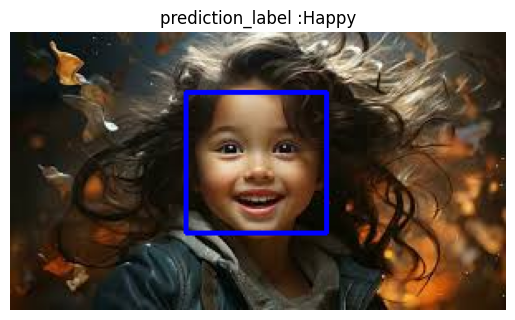

In [16]:
loadFile("happy.jpeg",Emotion_Classes)